In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('seaborn-white')

In [76]:
# loading data
data_2020 = pd.read_json(r'data\fine_filtered2020_attrs.json.bz2', compression='bz2')
data_2020

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains
0,2020-02-13-100687,This diet focuses on lifelong changes to healt...,None,[],2020-02-13 18:22:19,1,"[[None, 0.8001], [Dr. Sebi, 0.1999]]",[https://parade.com/995529/christinperry/dr-se...,E,None,None,None,None,None,None,None,None,[parade.com]
1,2020-02-07-007719,"As an empowered female leader myself, I am thr...",None,[],2020-02-07 13:09:21,1,"[[None, 0.9507], [Maye Musk, 0.0493]]",[https://www.perishablenews.com/produce/celebr...,E,None,None,None,None,None,None,None,None,[perishablenews.com]
2,2020-01-21-098307,We stack the freshly plucked fruits into three...,Sahi Ram,[Q19605026],2020-01-21 12:49:00,1,"[[Sahi Ram, 0.9035], [None, 0.0965]]",[http://freshplaza.com/article/9181949/the-tin...,E,Q19605026,[male],[India],[+1959-10-10T00:00:00Z],None,[politician],[Aam Aadmi Party],None,[freshplaza.com]
3,2020-02-12-011869,Burger Burger will use local produce as much a...,None,[],2020-02-12 18:56:09,1,"[[None, 0.9078], [El Chapo, 0.0922]]",[https://www.belfastlive.co.uk/whats-on/food-d...,E,None,None,None,None,None,None,None,None,[belfastlive.co.uk]
4,2020-01-07-042453,It's likely that as we're seeing drier conditi...,None,[],2020-01-07 23:40:00,2,"[[None, 0.9688], [Scott Morrison, 0.0312]]",[http://msn.com/en-au/news/australia/kookaburr...,E,None,None,None,None,None,None,None,None,"[msn.com, msn.com]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,2020-02-20-028821,I suppose because of my size and what I do for...,None,[],2020-02-20 19:00:00,2,"[[None, 0.7036], [Anthony Mullally, 0.2063], [...",[https://www.stuff.co.nz/sport/league/11967886...,E,None,None,None,None,None,None,None,None,"[stuff.co.nz, nzcity.co.nz]"
4268,2020-01-23-046052,In the early 2000s the City of Cedar Rapids wa...,Jason Andrews,"[Q22704361, Q55523316]",2020-01-23 13:00:05,1,"[[Jason Andrews, 0.8019], [None, 0.1981]]",[https://adventure.howstuffworks.com/outdoor-a...,E,None,None,None,None,None,None,None,None,[howstuffworks.com]
4269,2020-03-26-047830,People have mostly stayed in the last couple o...,Arvind Kejriwal,[Q59155],2020-03-26 09:10:20,2,"[[Arvind Kejriwal, 0.6215], [None, 0.3786]]",[https://www.newindianexpress.com/cities/delhi...,E,Q59155,[male],[India],[+1968-08-16T00:00:00Z],None,"[politician, bureaucrat]",[Aam Aadmi Party],None,"[newindianexpress.com, newkerala.com]"
4270,2020-04-04-035826,We have been seeing reports of farmers dumping...,Narayana Gowda,[Q6965507],2020-04-04 00:38:36,1,"[[Narayana Gowda, 0.8262], [None, 0.1738]]",[http://www.bangaloremirror.com/bangalore/othe...,E,Q6965507,[male],[India],[+1966-06-10T00:00:00Z],None,"[politician, activist]",[Janata Dal (Secular)],None,[bangaloremirror.com]


In [77]:
# function to convert list values to string values for convenience
def list_to_str (col_names):
    for col_name in col_names:
        data_2020[col_name] = data_2020[col_name].str[0]

In [78]:
col_names = ['gender', 'nationality', 'ethnic_group', 'occupation', 'party', 'academic_degree', 'domains']
list_to_str(col_names)
data_2020

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains
0,2020-02-13-100687,This diet focuses on lifelong changes to healt...,None,[],2020-02-13 18:22:19,1,"[[None, 0.8001], [Dr. Sebi, 0.1999]]",[https://parade.com/995529/christinperry/dr-se...,E,None,None,None,None,None,None,None,None,parade.com
1,2020-02-07-007719,"As an empowered female leader myself, I am thr...",None,[],2020-02-07 13:09:21,1,"[[None, 0.9507], [Maye Musk, 0.0493]]",[https://www.perishablenews.com/produce/celebr...,E,None,None,None,None,None,None,None,None,perishablenews.com
2,2020-01-21-098307,We stack the freshly plucked fruits into three...,Sahi Ram,[Q19605026],2020-01-21 12:49:00,1,"[[Sahi Ram, 0.9035], [None, 0.0965]]",[http://freshplaza.com/article/9181949/the-tin...,E,Q19605026,male,India,[+1959-10-10T00:00:00Z],None,politician,Aam Aadmi Party,None,freshplaza.com
3,2020-02-12-011869,Burger Burger will use local produce as much a...,None,[],2020-02-12 18:56:09,1,"[[None, 0.9078], [El Chapo, 0.0922]]",[https://www.belfastlive.co.uk/whats-on/food-d...,E,None,None,None,None,None,None,None,None,belfastlive.co.uk
4,2020-01-07-042453,It's likely that as we're seeing drier conditi...,None,[],2020-01-07 23:40:00,2,"[[None, 0.9688], [Scott Morrison, 0.0312]]",[http://msn.com/en-au/news/australia/kookaburr...,E,None,None,None,None,None,None,None,None,msn.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,2020-02-20-028821,I suppose because of my size and what I do for...,None,[],2020-02-20 19:00:00,2,"[[None, 0.7036], [Anthony Mullally, 0.2063], [...",[https://www.stuff.co.nz/sport/league/11967886...,E,None,None,None,None,None,None,None,None,stuff.co.nz
4268,2020-01-23-046052,In the early 2000s the City of Cedar Rapids wa...,Jason Andrews,"[Q22704361, Q55523316]",2020-01-23 13:00:05,1,"[[Jason Andrews, 0.8019], [None, 0.1981]]",[https://adventure.howstuffworks.com/outdoor-a...,E,None,None,None,None,None,None,None,None,howstuffworks.com
4269,2020-03-26-047830,People have mostly stayed in the last couple o...,Arvind Kejriwal,[Q59155],2020-03-26 09:10:20,2,"[[Arvind Kejriwal, 0.6215], [None, 0.3786]]",[https://www.newindianexpress.com/cities/delhi...,E,Q59155,male,India,[+1968-08-16T00:00:00Z],None,politician,Aam Aadmi Party,None,newindianexpress.com
4270,2020-04-04-035826,We have been seeing reports of farmers dumping...,Narayana Gowda,[Q6965507],2020-04-04 00:38:36,1,"[[Narayana Gowda, 0.8262], [None, 0.1738]]",[http://www.bangaloremirror.com/bangalore/othe...,E,Q6965507,male,India,[+1966-06-10T00:00:00Z],None,politician,Janata Dal (Secular),None,bangaloremirror.com


In [54]:
# data_2020['probas'] = data_2020['probas'].str[0]
# data_2020['probas']

0                  [None, 0.8001]
1                  [None, 0.9507]
2              [Sahi Ram, 0.9035]
3                  [None, 0.9078]
4                  [None, 0.9688]
                  ...            
4267               [None, 0.7036]
4268      [Jason Andrews, 0.8019]
4269    [Arvind Kejriwal, 0.6215]
4270     [Narayana Gowda, 0.8262]
4271    [Rosalind Brewer, 0.8862]
Name: probas, Length: 4272, dtype: object

In [56]:
# data_2020['probas'] = data_2020['probas'].str[0]
# data_2020['probas']

0                  None
1                  None
2              Sahi Ram
3                  None
4                  None
             ...       
4267               None
4268      Jason Andrews
4269    Arvind Kejriwal
4270     Narayana Gowda
4271    Rosalind Brewer
Name: probas, Length: 4272, dtype: object

In the following cells, I plotted the distributions of some speakers' characteristics just for us to have a general view of the most frequent values.

Text(0, 0.5, 'Number of quotations')

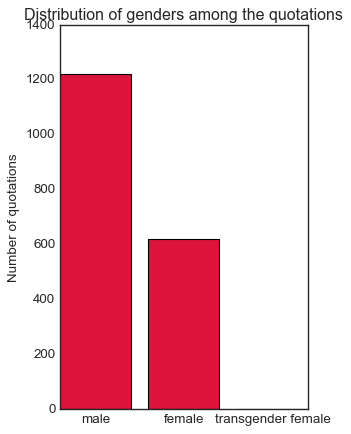

In [271]:
genders = data_2020['gender'].dropna().value_counts()
plt.figure(figsize=(4, 6))
plt.bar(*zip(*genders.items()), color='crimson')
plt.title('Distribution of genders among the quotations')
plt.ylabel('Number of quotations')

In [240]:
nationalities = data_2020['nationality'].dropna().value_counts().head(10).sort_values(ascending=True)
nationalities

Germany                      12
Philippines                  13
France                       14
Ireland                      14
New Zealand                  28
Canada                       67
Australia                   111
United Kingdom              252
India                       278
United States of America    527
Name: nationality, dtype: int64

Text(0.5, 0, 'Number of quotations')

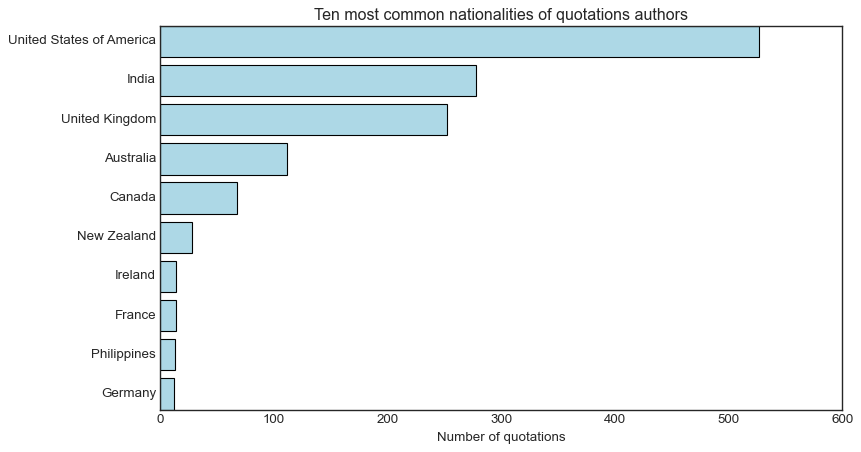

In [272]:
plt.figure(figsize=(11, 6))
plt.barh(*zip(*nationalities.items()), color='lightblue')
plt.title('Ten most common nationalities of quotations authors')
plt.xlabel('Number of quotations')

In [238]:
ethnic_group = data_2020['ethnic_group'].dropna().value_counts().head(10).sort_values(ascending=True)

Text(0.5, 0, 'Number of quotations')

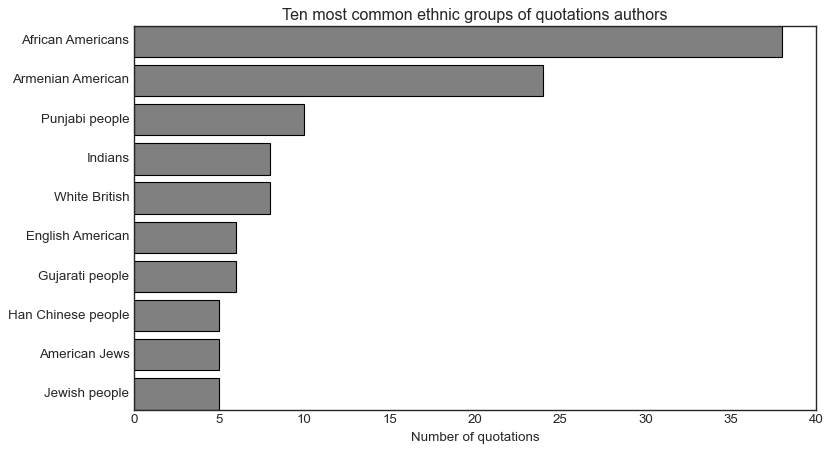

In [273]:
plt.figure(figsize=(11, 6))
plt.barh(*zip(*ethnic_group.items()), color='grey')
plt.title('Ten most common ethnic groups of quotations authors')
plt.xlabel('Number of quotations')

In [236]:
occupation = data_2020['occupation'].dropna().value_counts().head(20).sort_values(ascending=True)
occupation

singer-songwriter               15
television actor                16
tennis player                   16
baseball player                 19
economist                       20
entrepreneur                    21
lawyer                          21
film actor                      25
fashion designer                27
cricketer                       27
model                           33
association football player     39
singer                          47
writer                          48
businessperson                  48
journalist                      61
chef                            66
researcher                     123
actor                          215
politician                     324
Name: occupation, dtype: int64

Text(0.5, 0, 'Number of quotations')

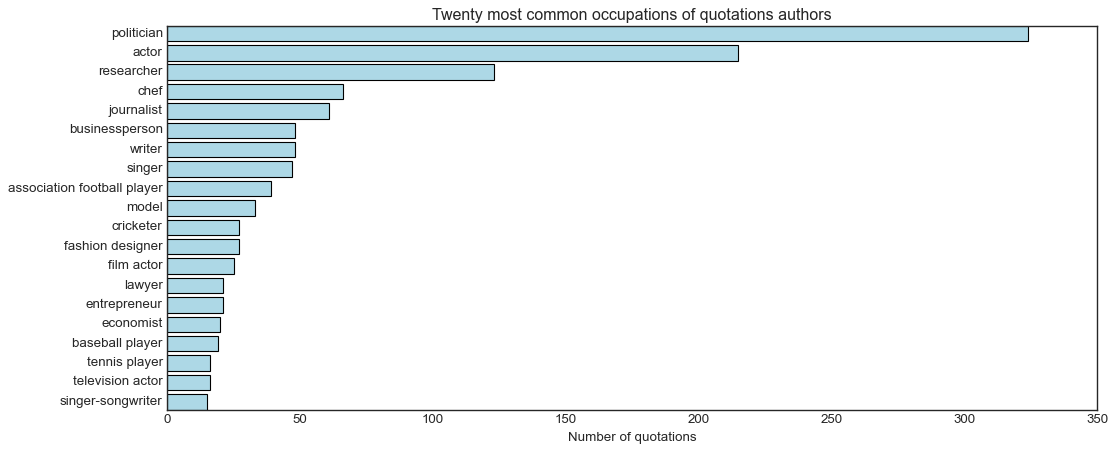

In [274]:
plt.figure(figsize=(15, 6))
plt.barh(*zip(*occupation.items()), color='lightblue')
plt.title('Twenty most common occupations of quotations authors')
plt.xlabel('Number of quotations')

In [234]:
party = data_2020['party'].dropna().value_counts().head(10).sort_values(ascending=True)
party

Nationalist Congress Party                            9
Zimbabwe African National Union – Patriotic Front    10
Shiv Sena                                            12
Labour Party                                         19
Conservative Party                                   19
Aam Aadmi Party                                      22
Bharatiya Janata Party                               39
Republican Party                                     40
Indian National Congress                             48
Democratic Party                                     63
Name: party, dtype: int64

Text(0.5, 0, 'Number of quotations')

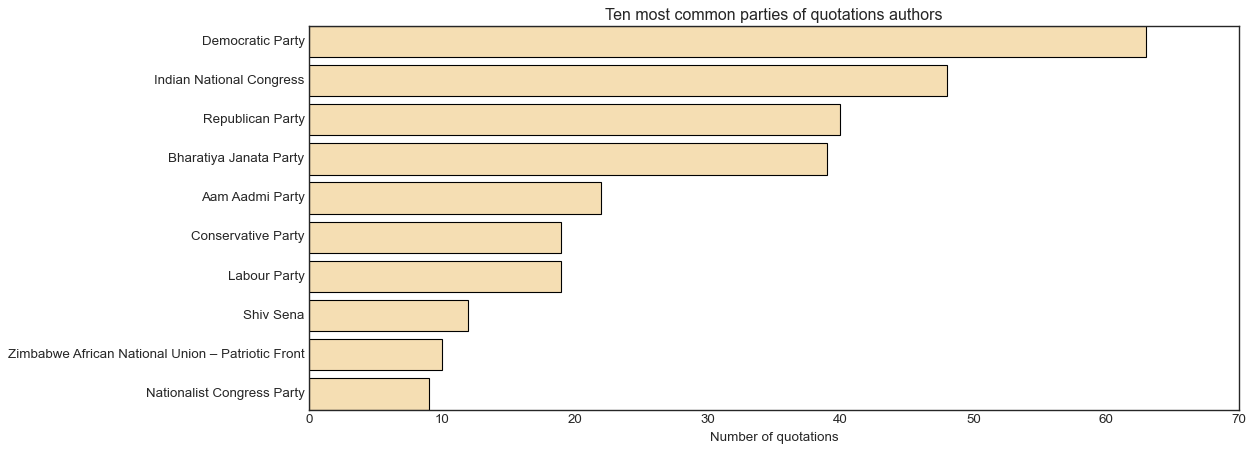

In [275]:
plt.figure(figsize=(15, 6))
plt.barh(*zip(*party.items()), color='wheat')
plt.title('Ten most common parties of quotations authors')
plt.xlabel('Number of quotations')

In [247]:
academic_degree = data_2020['academic_degree'].dropna().value_counts().sort_values(ascending=True)
academic_degree

Doctor of Juridical Science     1
bachelor's degree               1
Doktor Nauk in Philosophy       1
Doctor of Theology              1
Doctorate in France             1
Doctor of Economics             1
Juris Doctor                    1
doctorate                       2
Doctor of Sciences              3
Doctor of Philosophy            3
Master of Arts                  4
Bachelor of Arts                6
Bachelor of Science            11
Name: academic_degree, dtype: int64

Text(0.5, 0, 'Number of quotations')

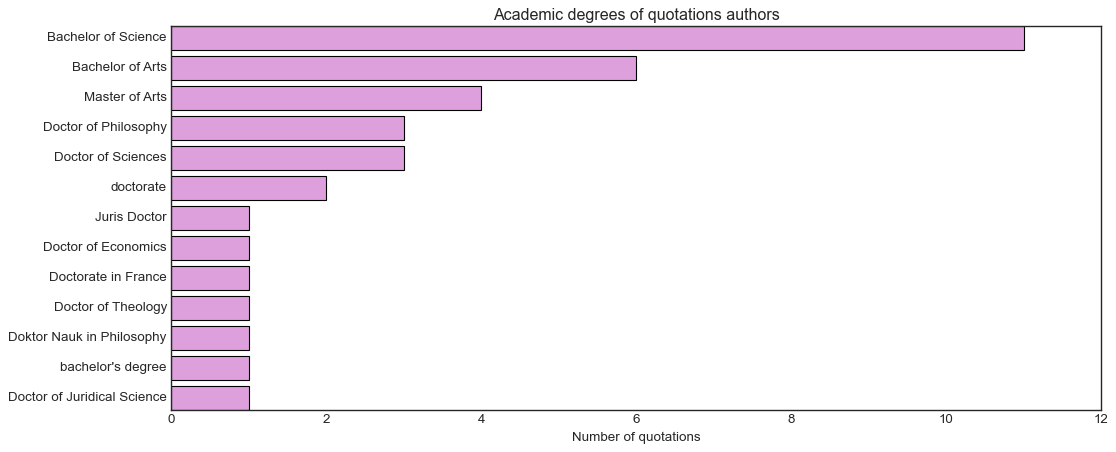

In [262]:
plt.figure(figsize=(15, 6))
plt.barh(*zip(*academic_degree.items()), color='plum')
plt.title('Academic degrees of quotations authors')
plt.xlabel('Number of quotations')

In [253]:
domains = data_2020['domains'].dropna().value_counts().head(20).sort_values(ascending=True)
domains

nzcity.co.nz          26
eurekalert.org        27
nytimes.com           28
cheatsheet.com        28
breitbart.com         29
telegraphindia.com    30
mirror.co.uk          30
aninews.in            30
thesun.co.uk          32
stuff.co.nz           32
canindia.com          33
mid-day.com           33
telegraph.co.uk       36
indianexpress.com     47
msn.com               51
express.co.uk         53
thehindu.com          61
vegnews.com           62
indiatimes.com        70
freshplaza.com        97
Name: domains, dtype: int64

Text(0.5, 0, 'Number of quotations')

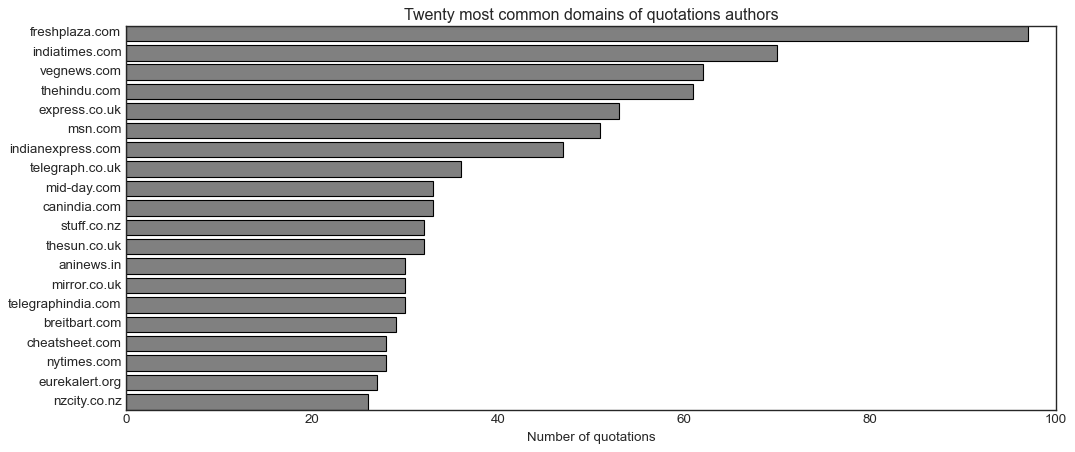

In [276]:
plt.figure(figsize=(15, 6))
plt.barh(*zip(*domains.items()), color='grey')
plt.title('Twenty most common domains of quotations authors')
plt.xlabel('Number of quotations')